In [1]:
import exponential_new
import numpy as np
import pandas as pd
from cutoffs_new import Polynomial
import tensorflow as tf
import matplotlib.pyplot as plt
import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
turbs = ["Siemens"] *2
nl=exponential_new.NeighborlistCalculator(cutoff=4001,ang_cutoff=np.pi/6.)
Gs = {"Siemens": [{"type":"G2", "turbine":"Siemens","eta":5.3, "offset": 1.},{"type":"G4", "elements":"Siemens","eta":5., "gamma":4., "zeta":1.0}]}
symbol="Siemens"
dataset_pos=np.empty(shape=(0, 2))
dataset_fp=np.empty(shape=(0, 2))
dataset_pri=np.empty(shape=(0, 1))

In [2]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0, 8])
    plt.xlabel('Epoch')
    plt.ylabel('Error [ref_wind_speed]')
    plt.legend()
    plt.grid(True)

In [3]:
def build_and_compile_model(norm):
    model = keras.Sequential([
        norm,
        layers.Dense(64, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(16, activation='relu'),
        layers.Dense(1)
    ])
    model.compile(loss='mean_absolute_error', optimizer=tf.keras.optimizers.Adam(0.001))
    return model

In [4]:
for distance in range(3,8,1):
    for angle in range(240,301,1):
        df=pd.read_csv('turbine_files/turbine_%sp00_10p00_report_%sD.csv' %(angle,distance), sep=' ', header=None)
        df=df.tail(1)
        df=pd.melt(df)
        df=df.dropna()
        a=df.to_numpy(dtype=float)
        a=a[:,1]
        pri=np.array([[a[22]],[a[19]]])
        position=np.array([[0., 0.], [((93.0*distance)*np.cos(np.deg2rad(270-angle))),((93.0*distance)*np.sin(np.deg2rad(270-angle)))]])
        #print("At angle: ", angle, pri,position[1])
        neigh=nl.calculate(turbs,position)
        finpr=exponential_new.FingerprintCalculator(cutoff=4001,Gs=Gs)
        fp=finpr.calculate(turbs,position,neigh,symbol)
        fp=np.array(fp)
        #pri=(pri,fp)
        #pri=np.concatenate((pri,fp), axis=None)
        dataset_pos=np.append(dataset_pos,position,axis=0)
        dataset_fp=np.append(dataset_fp,fp,axis=0)
        dataset_pri=np.append(dataset_pri,pri,axis=0)
dataset=np.concatenate((dataset_fp, dataset_pri),axis=1)

In [5]:
for angle in [270,272,275,280,286]:
    distance=800  
    df=pd.read_csv('turbine_files/turbine_%sp00_10p00_report_%s.csv' %(angle,distance), sep=' ', header=None)
    df=df.tail(1)
    df=pd.melt(df)
    df=df.dropna()
    a=df.to_numpy(dtype=float)
    a=a[:,1]
    pri=np.array([[a[22]],[a[19]]])
    position=np.array([[0., 0.], [(distance*np.cos(np.deg2rad(270-angle))),(distance*np.sin(np.deg2rad(270-angle)))]])
    neigh=nl.calculate(turbs,position)
    finpr=exponential_new.FingerprintCalculator(cutoff=4001,Gs=Gs)
    fp=finpr.calculate(turbs,position,neigh,symbol)
    fp=np.array(fp)
    dataset_pos=np.append(dataset_pos,position,axis=0)
    dataset_fp=np.append(dataset_fp,fp,axis=0)
    dataset_pri=np.append(dataset_pri,pri,axis=0)
dataset=np.concatenate((dataset_fp, dataset_pri),axis=1)

In [6]:
for angle in [270,273,276,278,279,283,288]:
    distance=1000  
    df=pd.read_csv('turbine_files/turbine_%sp00_10p00_report_%s.csv' %(angle,distance), sep=' ', header=None)
    df=df.tail(1)
    df=pd.melt(df)
    df=df.dropna()
    a=df.to_numpy(dtype=float)
    a=a[:,1]
    pri=np.array([[a[22]],[a[19]]])
    position=np.array([[0., 0.], [(distance*np.cos(np.deg2rad(270-angle))),(distance*np.sin(np.deg2rad(270-angle)))]])
    neigh=nl.calculate(turbs,position)
    finpr=exponential_new.FingerprintCalculator(cutoff=4001,Gs=Gs)
    fp=finpr.calculate(turbs,position,neigh,symbol)
    fp=np.array(fp)
    dataset_pos=np.append(dataset_pos,position,axis=0)
    dataset_fp=np.append(dataset_fp,fp,axis=0)
    dataset_pri=np.append(dataset_pri,pri,axis=0)
dataset=np.concatenate((dataset_fp, dataset_pri),axis=1)

In [7]:
for angle in [270,272,274,277,280,281]:
    distance=1250  
    df=pd.read_csv('turbine_files/turbine_%sp00_10p00_report_%s.csv' %(angle,distance), sep=' ', header=None)
    df=df.tail(1)
    df=pd.melt(df)
    df=df.dropna()
    a=df.to_numpy(dtype=float)
    a=a[:,1]
    pri=np.array([[a[22]],[a[19]]])
    position=np.array([[0., 0.], [(distance*np.cos(np.deg2rad(270-angle))),(distance*np.sin(np.deg2rad(270-angle)))]])
    neigh=nl.calculate(turbs,position)
    finpr=exponential_new.FingerprintCalculator(cutoff=4001,Gs=Gs)
    fp=finpr.calculate(turbs,position,neigh,symbol)
    fp=np.array(fp)
    dataset_pos=np.append(dataset_pos,position,axis=0)
    dataset_fp=np.append(dataset_fp,fp,axis=0)
    dataset_pri=np.append(dataset_pri,pri,axis=0)
dataset=np.concatenate((dataset_fp, dataset_pri),axis=1)

In [8]:
for angle in [270,271,272,273,274,278]:
    distance=1500  
    df=pd.read_csv('turbine_files/turbine_%sp00_10p00_report_%s.csv' %(angle,distance), sep=' ', header=None)
    df=df.tail(1)
    df=pd.melt(df)
    df=df.dropna()
    a=df.to_numpy(dtype=float)
    a=a[:,1]
    pri=np.array([[a[22]],[a[19]]])
    position=np.array([[0., 0.], [(distance*np.cos(np.deg2rad(270-angle))),(distance*np.sin(np.deg2rad(270-angle)))]])
    neigh=nl.calculate(turbs,position)
    finpr=exponential_new.FingerprintCalculator(cutoff=4001,Gs=Gs)
    fp=finpr.calculate(turbs,position,neigh,symbol)
    fp=np.array(fp)
    dataset_pos=np.append(dataset_pos,position,axis=0)
    dataset_fp=np.append(dataset_fp,fp,axis=0)
    dataset_pri=np.append(dataset_pri,pri,axis=0)
dataset=np.concatenate((dataset_fp, dataset_pri),axis=1)

In [9]:
for angle in [270,274,275,276,279]:
    distance=1750  
    df=pd.read_csv('turbine_files/turbine_%sp00_10p00_report_%s.csv' %(angle,distance), sep=' ', header=None)
    df=df.tail(1)
    df=pd.melt(df)
    df=df.dropna()
    a=df.to_numpy(dtype=float)
    a=a[:,1]
    pri=np.array([[a[22]],[a[19]]])
    position=np.array([[0., 0.], [(distance*np.cos(np.deg2rad(270-angle))),(distance*np.sin(np.deg2rad(270-angle)))]])
    neigh=nl.calculate(turbs,position)
    finpr=exponential_new.FingerprintCalculator(cutoff=4001,Gs=Gs)
    fp=finpr.calculate(turbs,position,neigh,symbol)
    fp=np.array(fp)
    dataset_pos=np.append(dataset_pos,position,axis=0)
    dataset_fp=np.append(dataset_fp,fp,axis=0)
    dataset_pri=np.append(dataset_pri,pri,axis=0)
dataset=np.concatenate((dataset_fp, dataset_pri),axis=1)

In [10]:
for angle in [270,278]:
    distance=2000  
    df=pd.read_csv('turbine_files/turbine_%sp00_10p00_report_%s.csv' %(angle,distance), sep=' ', header=None)
    df=df.tail(1)
    df=pd.melt(df)
    df=df.dropna()
    a=df.to_numpy(dtype=float)
    a=a[:,1]
    pri=np.array([[a[22]],[a[19]]])
    position=np.array([[0., 0.], [(distance*np.cos(np.deg2rad(270-angle))),(distance*np.sin(np.deg2rad(270-angle)))]])
    neigh=nl.calculate(turbs,position)
    finpr=exponential_new.FingerprintCalculator(cutoff=4001,Gs=Gs)
    fp=finpr.calculate(turbs,position,neigh,symbol)
    fp=np.array(fp)
    dataset_pos=np.append(dataset_pos,position,axis=0)
    dataset_fp=np.append(dataset_fp,fp,axis=0)
    dataset_pri=np.append(dataset_pri,pri,axis=0)
dataset=np.concatenate((dataset_fp, dataset_pri),axis=1)

In [11]:
for angle in [270,271,274]:
    distance=2250  
    df=pd.read_csv('turbine_files/turbine_%sp00_10p00_report_%s.csv' %(angle,distance), sep=' ', header=None)
    df=df.tail(1)
    df=pd.melt(df)
    df=df.dropna()
    a=df.to_numpy(dtype=float)
    a=a[:,1]
    pri=np.array([[a[22]],[a[19]]])
    position=np.array([[0., 0.], [(distance*np.cos(np.deg2rad(270-angle))),(distance*np.sin(np.deg2rad(270-angle)))]])
    neigh=nl.calculate(turbs,position)
    finpr=exponential_new.FingerprintCalculator(cutoff=4001,Gs=Gs)
    fp=finpr.calculate(turbs,position,neigh,symbol)
    fp=np.array(fp)
    dataset_pos=np.append(dataset_pos,position,axis=0)
    dataset_fp=np.append(dataset_fp,fp,axis=0)
    dataset_pri=np.append(dataset_pri,pri,axis=0)
dataset=np.concatenate((dataset_fp, dataset_pri),axis=1)

In [12]:
for angle in [270,272]:
    distance=2500  
    df=pd.read_csv('turbine_files/turbine_%sp00_10p00_report_%s.csv' %(angle,distance), sep=' ', header=None)
    df=df.tail(1)
    df=pd.melt(df)
    df=df.dropna()
    a=df.to_numpy(dtype=float)
    a=a[:,1]
    pri=np.array([[a[22]],[a[19]]])
    position=np.array([[0., 0.], [(distance*np.cos(np.deg2rad(270-angle))),(distance*np.sin(np.deg2rad(270-angle)))]])
    neigh=nl.calculate(turbs,position)
    finpr=exponential_new.FingerprintCalculator(cutoff=4001,Gs=Gs)
    fp=finpr.calculate(turbs,position,neigh,symbol)
    fp=np.array(fp)
    dataset_pos=np.append(dataset_pos,position,axis=0)
    dataset_fp=np.append(dataset_fp,fp,axis=0)
    dataset_pri=np.append(dataset_pri,pri,axis=0)
dataset=np.concatenate((dataset_fp, dataset_pri),axis=1)

In [13]:
for angle in [270,275]:
    distance=2750  
    df=pd.read_csv('turbine_files/turbine_%sp00_10p00_report_%s.csv' %(angle,distance), sep=' ', header=None)
    df=df.tail(1)
    df=pd.melt(df)
    df=df.dropna()
    a=df.to_numpy(dtype=float)
    a=a[:,1]
    pri=np.array([[a[22]],[a[19]]])
    position=np.array([[0., 0.], [(distance*np.cos(np.deg2rad(270-angle))),(distance*np.sin(np.deg2rad(270-angle)))]])
    neigh=nl.calculate(turbs,position)
    finpr=exponential_new.FingerprintCalculator(cutoff=4001,Gs=Gs)
    fp=finpr.calculate(turbs,position,neigh,symbol)
    fp=np.array(fp)
    dataset_pos=np.append(dataset_pos,position,axis=0)
    dataset_fp=np.append(dataset_fp,fp,axis=0)
    dataset_pri=np.append(dataset_pri,pri,axis=0)
dataset=np.concatenate((dataset_fp, dataset_pri),axis=1)

In [14]:
for angle in [270,272]:
    distance=3000  
    df=pd.read_csv('turbine_files/turbine_%sp00_10p00_report_%s.csv' %(angle,distance), sep=' ', header=None)
    df=df.tail(1)
    df=pd.melt(df)
    df=df.dropna()
    a=df.to_numpy(dtype=float)
    a=a[:,1]
    pri=np.array([[a[22]],[a[19]]])
    position=np.array([[0., 0.], [(distance*np.cos(np.deg2rad(270-angle))),(distance*np.sin(np.deg2rad(270-angle)))]])
    neigh=nl.calculate(turbs,position)
    finpr=exponential_new.FingerprintCalculator(cutoff=4001,Gs=Gs)
    fp=finpr.calculate(turbs,position,neigh,symbol)
    fp=np.array(fp)
    dataset_pos=np.append(dataset_pos,position,axis=0)
    dataset_fp=np.append(dataset_fp,fp,axis=0)
    dataset_pri=np.append(dataset_pri,pri,axis=0)
dataset=np.concatenate((dataset_fp, dataset_pri),axis=1)

In [15]:
for angle in [270,273,275]:
    distance=3200  
    df=pd.read_csv('turbine_files/turbine_%sp00_10p00_report_%s.csv' %(angle,distance), sep=' ', header=None)
    df=df.tail(1)
    df=pd.melt(df)
    df=df.dropna()
    a=df.to_numpy(dtype=float)
    a=a[:,1]
    pri=np.array([[a[22]],[a[19]]])
    position=np.array([[0., 0.], [(distance*np.cos(np.deg2rad(270-angle))),(distance*np.sin(np.deg2rad(270-angle)))]])
    neigh=nl.calculate(turbs,position)
    finpr=exponential_new.FingerprintCalculator(cutoff=4001,Gs=Gs)
    fp=finpr.calculate(turbs,position,neigh,symbol)
    fp=np.array(fp)
    dataset_pos=np.append(dataset_pos,position,axis=0)
    dataset_fp=np.append(dataset_fp,fp,axis=0)
    dataset_pri=np.append(dataset_pri,pri,axis=0)
dataset=np.concatenate((dataset_fp, dataset_pri),axis=1)

In [16]:
for angle in [270,271,273]:
    distance=3500  
    df=pd.read_csv('turbine_files/turbine_%sp00_10p00_report_%s.csv' %(angle,distance), sep=' ', header=None)
    df=df.tail(1)
    df=pd.melt(df)
    df=df.dropna()
    a=df.to_numpy(dtype=float)
    a=a[:,1]
    pri=np.array([[a[22]],[a[19]]])
    position=np.array([[0., 0.], [(distance*np.cos(np.deg2rad(270-angle))),(distance*np.sin(np.deg2rad(270-angle)))]])
    neigh=nl.calculate(turbs,position)
    finpr=exponential_new.FingerprintCalculator(cutoff=4001,Gs=Gs)
    fp=finpr.calculate(turbs,position,neigh,symbol)
    fp=np.array(fp)
    dataset_pos=np.append(dataset_pos,position,axis=0)
    dataset_fp=np.append(dataset_fp,fp,axis=0)
    dataset_pri=np.append(dataset_pri,pri,axis=0)
dataset=np.concatenate((dataset_fp, dataset_pri),axis=1)

In [17]:
angle=270
distance=4000  
df=pd.read_csv('turbine_files/turbine_%sp00_10p00_report_%s.csv' %(angle,distance), sep=' ', header=None)
df=df.tail(1)
df=pd.melt(df)
df=df.dropna()
a=df.to_numpy(dtype=float)
a=a[:,1]
pri=np.array([[a[22]],[a[19]]])
position=np.array([[0., 0.], [(distance*np.cos(np.deg2rad(270-angle))),(distance*np.sin(np.deg2rad(270-angle)))]])
neigh=nl.calculate(turbs,position)
finpr=exponential_new.FingerprintCalculator(cutoff=4001,Gs=Gs)
fp=finpr.calculate(turbs,position,neigh,symbol)
fp=np.array(fp)
dataset_pos=np.append(dataset_pos,position,axis=0)
dataset_fp=np.append(dataset_fp,fp,axis=0)
dataset_pri=np.append(dataset_pri,pri,axis=0)
dataset=np.concatenate((dataset_fp, dataset_pri),axis=1)

In [18]:
dataset = pd.DataFrame(dataset, columns = ['Fingerprint(G2)','Fingerprint(G4)','Ref_Wind_Speed'])


In [19]:
dataset

,Fingerprint(G2),Fingerprint(G4),Ref_Wind_Speed
0,1.000000,1.000000,7.479762
1,0.308061,0.879813,7.576231
2,1.000000,1.000000,7.473602
3,0.308061,0.871123,7.567527
4,1.000000,1.000000,7.467848
...,...,...,...
699,0.992108,0.983475,7.245134
700,1.000000,1.000000,7.483274
701,0.992108,0.985629,7.384614
702,1.000000,1.000000,7.433140


In [20]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

In [21]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()
all_features = dataset.copy()

train_labels = train_features.pop('Ref_Wind_Speed')
test_labels = test_features.pop('Ref_Wind_Speed')
all_labels = all_features.pop('Ref_Wind_Speed')

In [22]:
train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
Fingerprint(G2),0.755911,0.273376
Fingerprint(G4),0.817771,0.243344
Ref_Wind_Speed,7.194320,0.594781


In [23]:
normalizer = preprocessing.Normalization(axis=-1)
normalizer.adapt(np.array(train_features))
print(normalizer.mean.numpy())

[[0.7559109  0.81777096]]


In [24]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 2)                5         
 n)                                                              
                                                                 
 dense (Dense)               (None, 64)                192       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                        

In [25]:
%%time
history = dnn_model.fit(
    train_features, train_labels,
    validation_split=0.2,
    verbose=0, epochs=120)

CPU times: user 6.35 s, sys: 1.09 s, total: 7.44 s
Wall time: 4.85 s


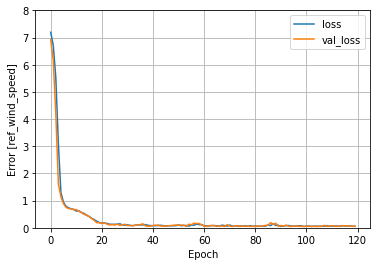

In [26]:
plot_loss(history)

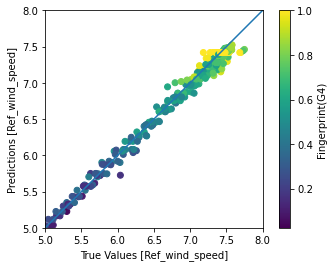

In [27]:
test_predictions = dnn_model.predict(test_features).flatten()
train_predictions = dnn_model.predict(train_features).flatten()
a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions,c=test_features["Fingerprint(G4)"])
plt.scatter(train_labels, train_predictions,c=train_features["Fingerprint(G4)"])
plt.xlabel('True Values [Ref_wind_speed]')
plt.ylabel('Predictions [Ref_wind_speed]')
cbar=plt.colorbar()
cbar.set_label('Fingerprint(G4)')
lims = [5, 8]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

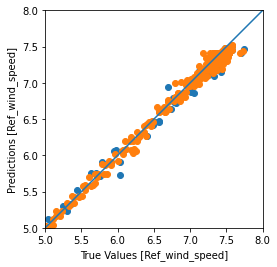

In [28]:
est_predictions = dnn_model.predict(test_features).flatten()
train_predictions = dnn_model.predict(train_features).flatten()
a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.scatter(train_labels, train_predictions)
plt.xlabel('True Values [Ref_wind_speed]')
plt.ylabel('Predictions [Ref_wind_speed]')

lims = [5, 8]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

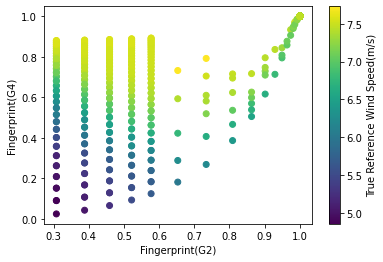

In [29]:
a = plt.axes
plt.scatter(test_features["Fingerprint(G2)"], test_features["Fingerprint(G4)"],c=np.abs(test_labels))
plt.scatter(train_features["Fingerprint(G2)"], train_features["Fingerprint(G4)"],c=np.abs(train_labels))
#plt.scatter(train_labels, train_predictions)
plt.xlabel('Fingerprint(G2)')
plt.ylabel('Fingerprint(G4)')
cbar=plt.colorbar()
cbar.set_label('True Reference Wind Speed(m/s)')
#_ = plt.plot()

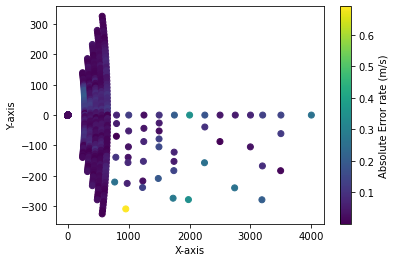

In [51]:
all_predictions = dnn_model.predict(all_features).flatten()
a = plt.axes
error_all=all_predictions-all_labels
plt.scatter(dataset_pos[:,0], dataset_pos[:,1],c=np.abs(error_all))
#plt.scatter(train_features["Fingerprint(G2)"], train_features["Fingerprint(G4)"],c=train_labels)
#plt.scatter(train_labels, train_predictions)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
cbar=plt.colorbar()
cbar.set_label('Absolute Error rate (m/s)')

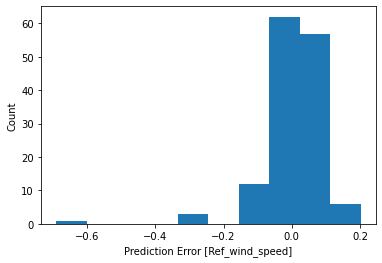

In [30]:
error = test_predictions - test_labels
plt.hist(error, bins=10)
plt.xlabel('Prediction Error [Ref_wind_speed]')
_ = plt.ylabel('Count')

In [31]:
dnn_model.save('dnn_model')

2022-02-22 10:11:30.032055: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: dnn_model/assets


In [32]:
print(min(error),max(error))

-0.6903910653491208 0.2012944268566894


In [33]:
np.array(error)

array([ 1.84539152e-04, -1.99236891e-02,  3.64847161e-02,  1.08949181e-01,
        3.96070485e-02,  5.18836985e-02,  7.32531585e-02,  1.76716331e-01,
        7.72476185e-02,  1.69069287e-01,  1.38038155e-01,  1.27630232e-01,
        5.72495442e-02,  1.15258218e-01,  1.03212828e-01,  8.99472285e-02,
        7.58843385e-02,  7.28116085e-02,  7.40961985e-02,  6.02698285e-02,
        1.06747624e-01,  9.11440802e-02,  2.48651485e-02,  1.01782325e-01,
        1.73268285e-02,  6.29158012e-02,  1.31130025e-03, -8.13010160e-04,
        3.21202236e-02, -4.84485615e-02, -5.08308415e-02, -1.62792156e-02,
       -2.13336927e-02,  8.67653175e-03,  9.15670505e-03, -6.72579155e-03,
       -2.02579512e-02,  6.50691845e-03,  9.57469900e-02,  6.97097785e-02,
        9.54194020e-02,  7.98001285e-02,  7.41620085e-02, -2.30588876e-02,
        8.08472585e-02,  7.42268585e-02, -2.29301500e-02, -6.62045429e-02,
       -5.88593494e-02, -7.71269833e-02, -2.62827915e-02, -2.75177927e-02,
       -7.70373315e-02, -

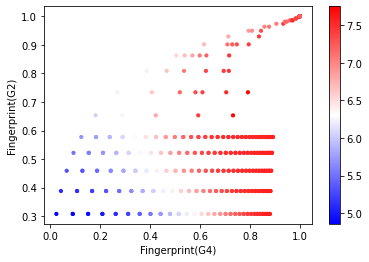

In [52]:
import matplotlib.cm as cm
plt.scatter(dataset['Fingerprint(G4)'],dataset['Fingerprint(G2)'], c=dataset['Ref_Wind_Speed'], s=10, cmap=cm.bwr)
cbar= plt.colorbar()
plt.xlabel('Fingerprint(G4)')
plt.ylabel('Fingerprint(G2)')
plt.show()

In [ ]:
dnn_model.evaluate(test_features, test_labels, verbose=0)

In [ ]:
max(dataset_pos[:,1])

In [ ]:
dataset

In [ ]:
if 5 in dataset:
        print("YES")
else:
        print("NO")